## A First Taste of Applied Machine Learning

#### looking at the data

In [1]:
import pandas as pd

In [3]:
rent = pd.read_csv('rent-ideal.csv')
rent.head(7)

,bedrooms,bathrooms,latitude,longitude,price
0,1,1.0,40.7108,-73.9539,2400
1,2,1.0,40.7513,-73.9722,3800
2,2,1.0,40.7575,-73.9625,3495
3,3,1.5,40.7145,-73.9425,3000
4,0,1.0,40.7439,-73.9743,2795
5,3,1.0,40.7348,-73.9865,7200
6,3,2.0,40.7302,-73.9826,6000


In [4]:
rent.tail()

,bedrooms,bathrooms,latitude,longitude,price
48295,3,1.0,40.8433,-73.9396,2800
48296,2,1.0,40.8198,-73.9578,2395
48297,1,1.0,40.5765,-73.9554,1850
48298,2,1.0,40.7448,-74.0017,4195
48299,3,1.0,40.7594,-73.9712,4280


In [5]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48300 entries, 0 to 48299
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   48300 non-null  int64  
 1   bathrooms  48300 non-null  float64
 2   latitude   48300 non-null  float64
 3   longitude  48300 non-null  float64
 4   price      48300 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.8 MB


### Training a random forest model

In [6]:
X = rent[['bedrooms','bathrooms','latitude','longitude']]
y = rent['price']

In [7]:
X.head()

,bedrooms,bathrooms,latitude,longitude
0,1,1.0,40.7108,-73.9539
1,2,1.0,40.7513,-73.9722
2,2,1.0,40.7575,-73.9625
3,3,1.5,40.7145,-73.9425
4,0,1.0,40.7439,-73.9743


In [8]:
type(X)

pandas.core.frame.DataFrame

In [10]:
type(X.values)

numpy.ndarray

In [9]:
X.values

array([[  1.    ,   1.    ,  40.7108, -73.9539],
       [  2.    ,   1.    ,  40.7513, -73.9722],
       [  2.    ,   1.    ,  40.7575, -73.9625],
       ...,
       [  1.    ,   1.    ,  40.5765, -73.9554],
       [  2.    ,   1.    ,  40.7448, -74.0017],
       [  3.    ,   1.    ,  40.7594, -73.9712]])

In [13]:
X.shape

(48300, 4)

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10)

rf.fit(X,y)

RandomForestRegressor(n_estimators=10)

In [14]:
import numpy as np

unseen_sample = np.array([2,2,40,-73])

In [16]:
rf.predict([unseen_sample])

C:\Users\MAFSHAR\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1759.5])

### Does the model capture training data relationships?

In [18]:
X.values

array([[  1.    ,   1.    ,  40.7108, -73.9539],
       [  2.    ,   1.    ,  40.7513, -73.9722],
       [  2.    ,   1.    ,  40.7575, -73.9625],
       ...,
       [  1.    ,   1.    ,  40.5765, -73.9554],
       [  2.    ,   1.    ,  40.7448, -74.0017],
       [  3.    ,   1.    ,  40.7594, -73.9712]])

In [19]:
y.values

array([2400, 3800, 3495, ..., 1850, 4195, 4280], dtype=int64)

In [22]:
from sklearn.metrics import mean_absolute_error

In [31]:
preds = rf.predict(X)
e = mean_absolute_error(y,preds)
ep = e / y.mean() * 100

print(f"${e:.0f} average error; {ep:.2f}% error")

$190 average error; 5.51% error


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.25)

In [39]:
rf = RandomForestRegressor(n_estimators = 10)

rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [40]:
preds = rf.predict(X_test)
e = mean_absolute_error(y_test,preds)
ep = e / y.mean() * 100

print(f"${e:.0f} average error; {ep:.2f}% error")

$293 average error; 8.53% error


#### Hyper-parameters

In [61]:
rf_100 = RandomForestRegressor(n_estimators = 200)

rf_100.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [62]:
preds = rf_100.predict(X_test)
e = mean_absolute_error(y_test,preds)
ep = e / y.mean() * 100

print(f"${e:.0f} average error; {ep:.2f}% error")

$301 average error; 8.74% error


#### Feature impratances

In [46]:
pip install rfpimp

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10660 sha256=7a590bc01998dc3d4becf8d08d8afeaef634aed255d09b597deb576f5051b572
  Stored in directory: c:\users\mafshar\appdata\local\pip\cache\wheels\8a\47\c9\053e734c43f85fa336b795eca6fef84c824595d5d21cdb96d5
Successfully built rfpimp
Note: you may need to restart the kernel to use updated packages.


In [63]:
from rfpimp import *

features_ranking = importances(rf_100, X_test, y_test)
features_ranking

,Importance
Feature,
longitude,0.537303
bedrooms,0.512108
latitude,0.470829
bathrooms,0.453962


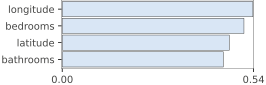

In [64]:
plot_importances(features_ranking)

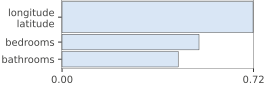

In [65]:
features_ranking = importances(rf_100, X_test, y_test , features = ['bedrooms','bathrooms',['longitude','latitude']])
plot_importances(features_ranking)

### Classification

In [67]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [69]:
X = cancer.data
y = cancer.target

df = pd.DataFrame(X, columns = cancer.feature_names)

df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [91]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [71]:
features = ['radius error','texture error','concave points error','symmetry error',
          'worst texture','worst smoothness','worst symmetry']

df= df[features]
df.head()

,radius error,texture error,concave points error,symmetry error,worst texture,worst smoothness,worst symmetry
0,1.0950,0.9053,0.01587,0.03003,17.33,0.1622,0.4601
1,0.5435,0.7339,0.01340,0.01389,23.41,0.1238,0.2750
2,0.7456,0.7869,0.02058,0.02250,25.53,0.1444,0.3613
3,0.4956,1.1560,0.01867,0.05963,26.50,0.2098,0.6638
4,0.7572,0.7813,0.01885,0.01756,16.67,0.1374,0.2364


In [78]:
X_train, X_test, y_train , y_test = train_test_split(df,y, test_size = 0.20)

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix


cl = RandomForestClassifier(n_estimators=200)
cl.fit(X_train,y_train)


RandomForestClassifier(n_estimators=200)

In [88]:
preds = cl.predict(X_test)
e = accuracy_score(y_test,preds)


print(f"{e*100:.2f}% accuracy")

91.23% accuracy


In [93]:
confusion_matrix(y_test,preds)

array([[43,  7],
       [ 3, 61]], dtype=int64)

In [89]:
features_ranking = importances(cl, X_test, y_test)
features_ranking

,Importance
Feature,
radius error,0.149123
worst texture,0.070175
worst smoothness,0.070175
concave points error,0.043860
symmetry error,0.035088
texture error,0.026316
worst symmetry,0.026316


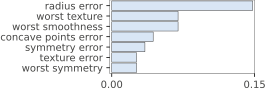

In [90]:
plot_importances(features_ranking)